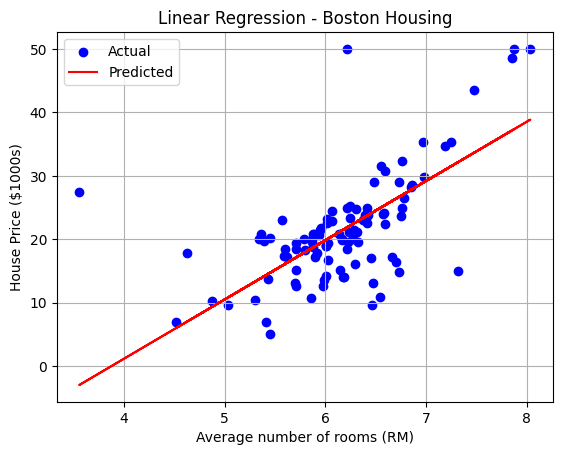

Boston Housing Dataset (Linear Regression):
Mean Squared Error: 46.144775347317264
R² Score: 0.3707569232254778 



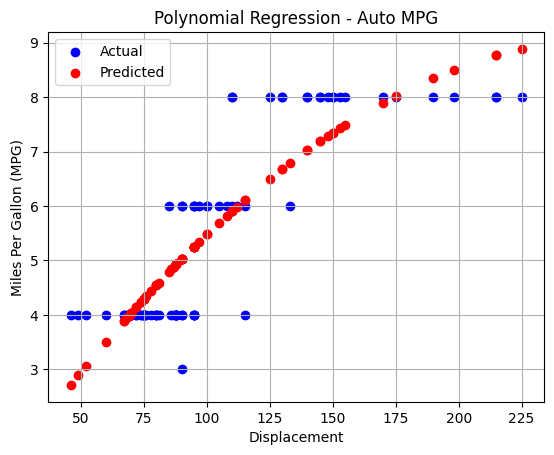

Auto MPG Dataset (Polynomial Regression):
Mean Squared Error: 0.743149055720586
R² Score: 0.7505650609469626


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


boston = fetch_openml(name="boston", version=1, as_frame=True)
X, y = boston.data[["RM"]], boston.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price ($1000s)")
plt.title("Linear Regression - Boston Housing")
plt.legend()
plt.grid()
plt.show()


print("Boston Housing Dataset (Linear Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred), "\n")


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
cols = ["mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin"]
df = pd.read_csv(url, sep="\s+", names=cols, na_values="?").dropna()

X, y = df[["disp"]], df["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Displacement")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Polynomial Regression - Auto MPG")
plt.legend()
plt.grid()
plt.show()


print("Auto MPG Dataset (Polynomial Regression):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
